In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dt=pd.read_csv('/content/drive/MyDrive/CSV_Files/training .csv')

In [ ]:
dt.head()

android  android.app.cts.permission.TEST_GRANTED  \
0        0                                        0   
1        0                                        0   
2        0                                        0   
3        0                                        0   
4        0                                        0   

   android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   android.os.cts.permission.TEST_GRANTED  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   android.permission.ACCESS_ALL_DOWNLOADS  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   android.permission.ACCESS_ALL_EXTERNAL_STORAGE  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   android.permission.ACCESS_BLUETOOTH_SHARE  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   android.permission.ACCESS_CACHE_FILESYSTEM  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   android.permission.ACCESS_CHECKIN_PROPERTIES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   android.permission.ACCESS_COARSE_LOCATION  ...  \
0                                          0  ...   
1                                          0  ...   
2                                          0  ...   
3                                          0  ...   
4                                          0  ...   

   com.android.voicemail.permission.WRITE_VOICEMAIL  com.foo.mypermission  \
0                                                 0                     0   
1                                                 0                     0   
2                                                 0                     0   
3                                                 0                     0   
4                                                 0                     0   

   com.foo.mypermission2  org.chromium.chrome.shell.permission.C2D_MESSAGE  \
0                      0                                                 0   
1                      0                                                 0   
2                      0                                                 0   
3                      0                                                 0   
4                      0                                                 0   

   org.chromium.chrome.shell.permission.DEBUG  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                    

In [ ]:
dt.columns


Index(['android', 'android.app.cts.permission.TEST_GRANTED',
       'android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE',
       'android.os.cts.permission.TEST_GRANTED',
       'android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_ALL_EXTERNAL_STORAGE',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_COARSE_LOCATION',
       ...
       'com.android.voicemail.permission.WRITE_VOICEMAIL',
       'com.foo.mypermission', 'com.foo.mypermission2',
       'org.chromium.chrome.shell.permission.C2D_MESSAGE',
       'org.chromium.chrome.shell.permission.DEBUG',
       'org.chromium.chrome.shell.permission.SANDBOX',
       'org.chromium.chromecast.shell.permission.SANDBOX',
       'org.chromium.content_shell.permission.SANDBOX', 'test_permission',
       'type'],
      dtype='object', length=331)

In [ ]:
dt.dtypes


android                                                        int64
android.app.cts.permission.TEST_GRANTED                        int64
android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE    int64
android.os.cts.permission.TEST_GRANTED                         int64
android.permission.ACCESS_ALL_DOWNLOADS                        int64
                                                               ...  
org.chromium.chrome.shell.permission.SANDBOX                   int64
org.chromium.chromecast.shell.permission.SANDBOX               int64
org.chromium.content_shell.permission.SANDBOX                  int64
test_permission                                                int64
type                                                           int64
Length: 331, dtype: object

In [ ]:
#to remove the spaces
cols = {}
for name in dt.columns:
        if name[0] is ' ':
            cols[name] = name[1:]
dt.rename(cols, axis=1, inplace=True, errors='raise')

In [ ]:
dt.columns


Index(['android', 'android.app.cts.permission.TEST_GRANTED',
       'android.intent.category.MASTER_CLEAR.permission.C2D_MESSAGE',
       'android.os.cts.permission.TEST_GRANTED',
       'android.permission.ACCESS_ALL_DOWNLOADS',
       'android.permission.ACCESS_ALL_EXTERNAL_STORAGE',
       'android.permission.ACCESS_BLUETOOTH_SHARE',
       'android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_CHECKIN_PROPERTIES',
       'android.permission.ACCESS_COARSE_LOCATION',
       ...
       'com.android.voicemail.permission.WRITE_VOICEMAIL',
       'com.foo.mypermission', 'com.foo.mypermission2',
       'org.chromium.chrome.shell.permission.C2D_MESSAGE',
       'org.chromium.chrome.shell.permission.DEBUG',
       'org.chromium.chrome.shell.permission.SANDBOX',
       'org.chromium.chromecast.shell.permission.SANDBOX',
       'org.chromium.content_shell.permission.SANDBOX', 'test_permission',
       'type'],
      dtype='object', length=331)

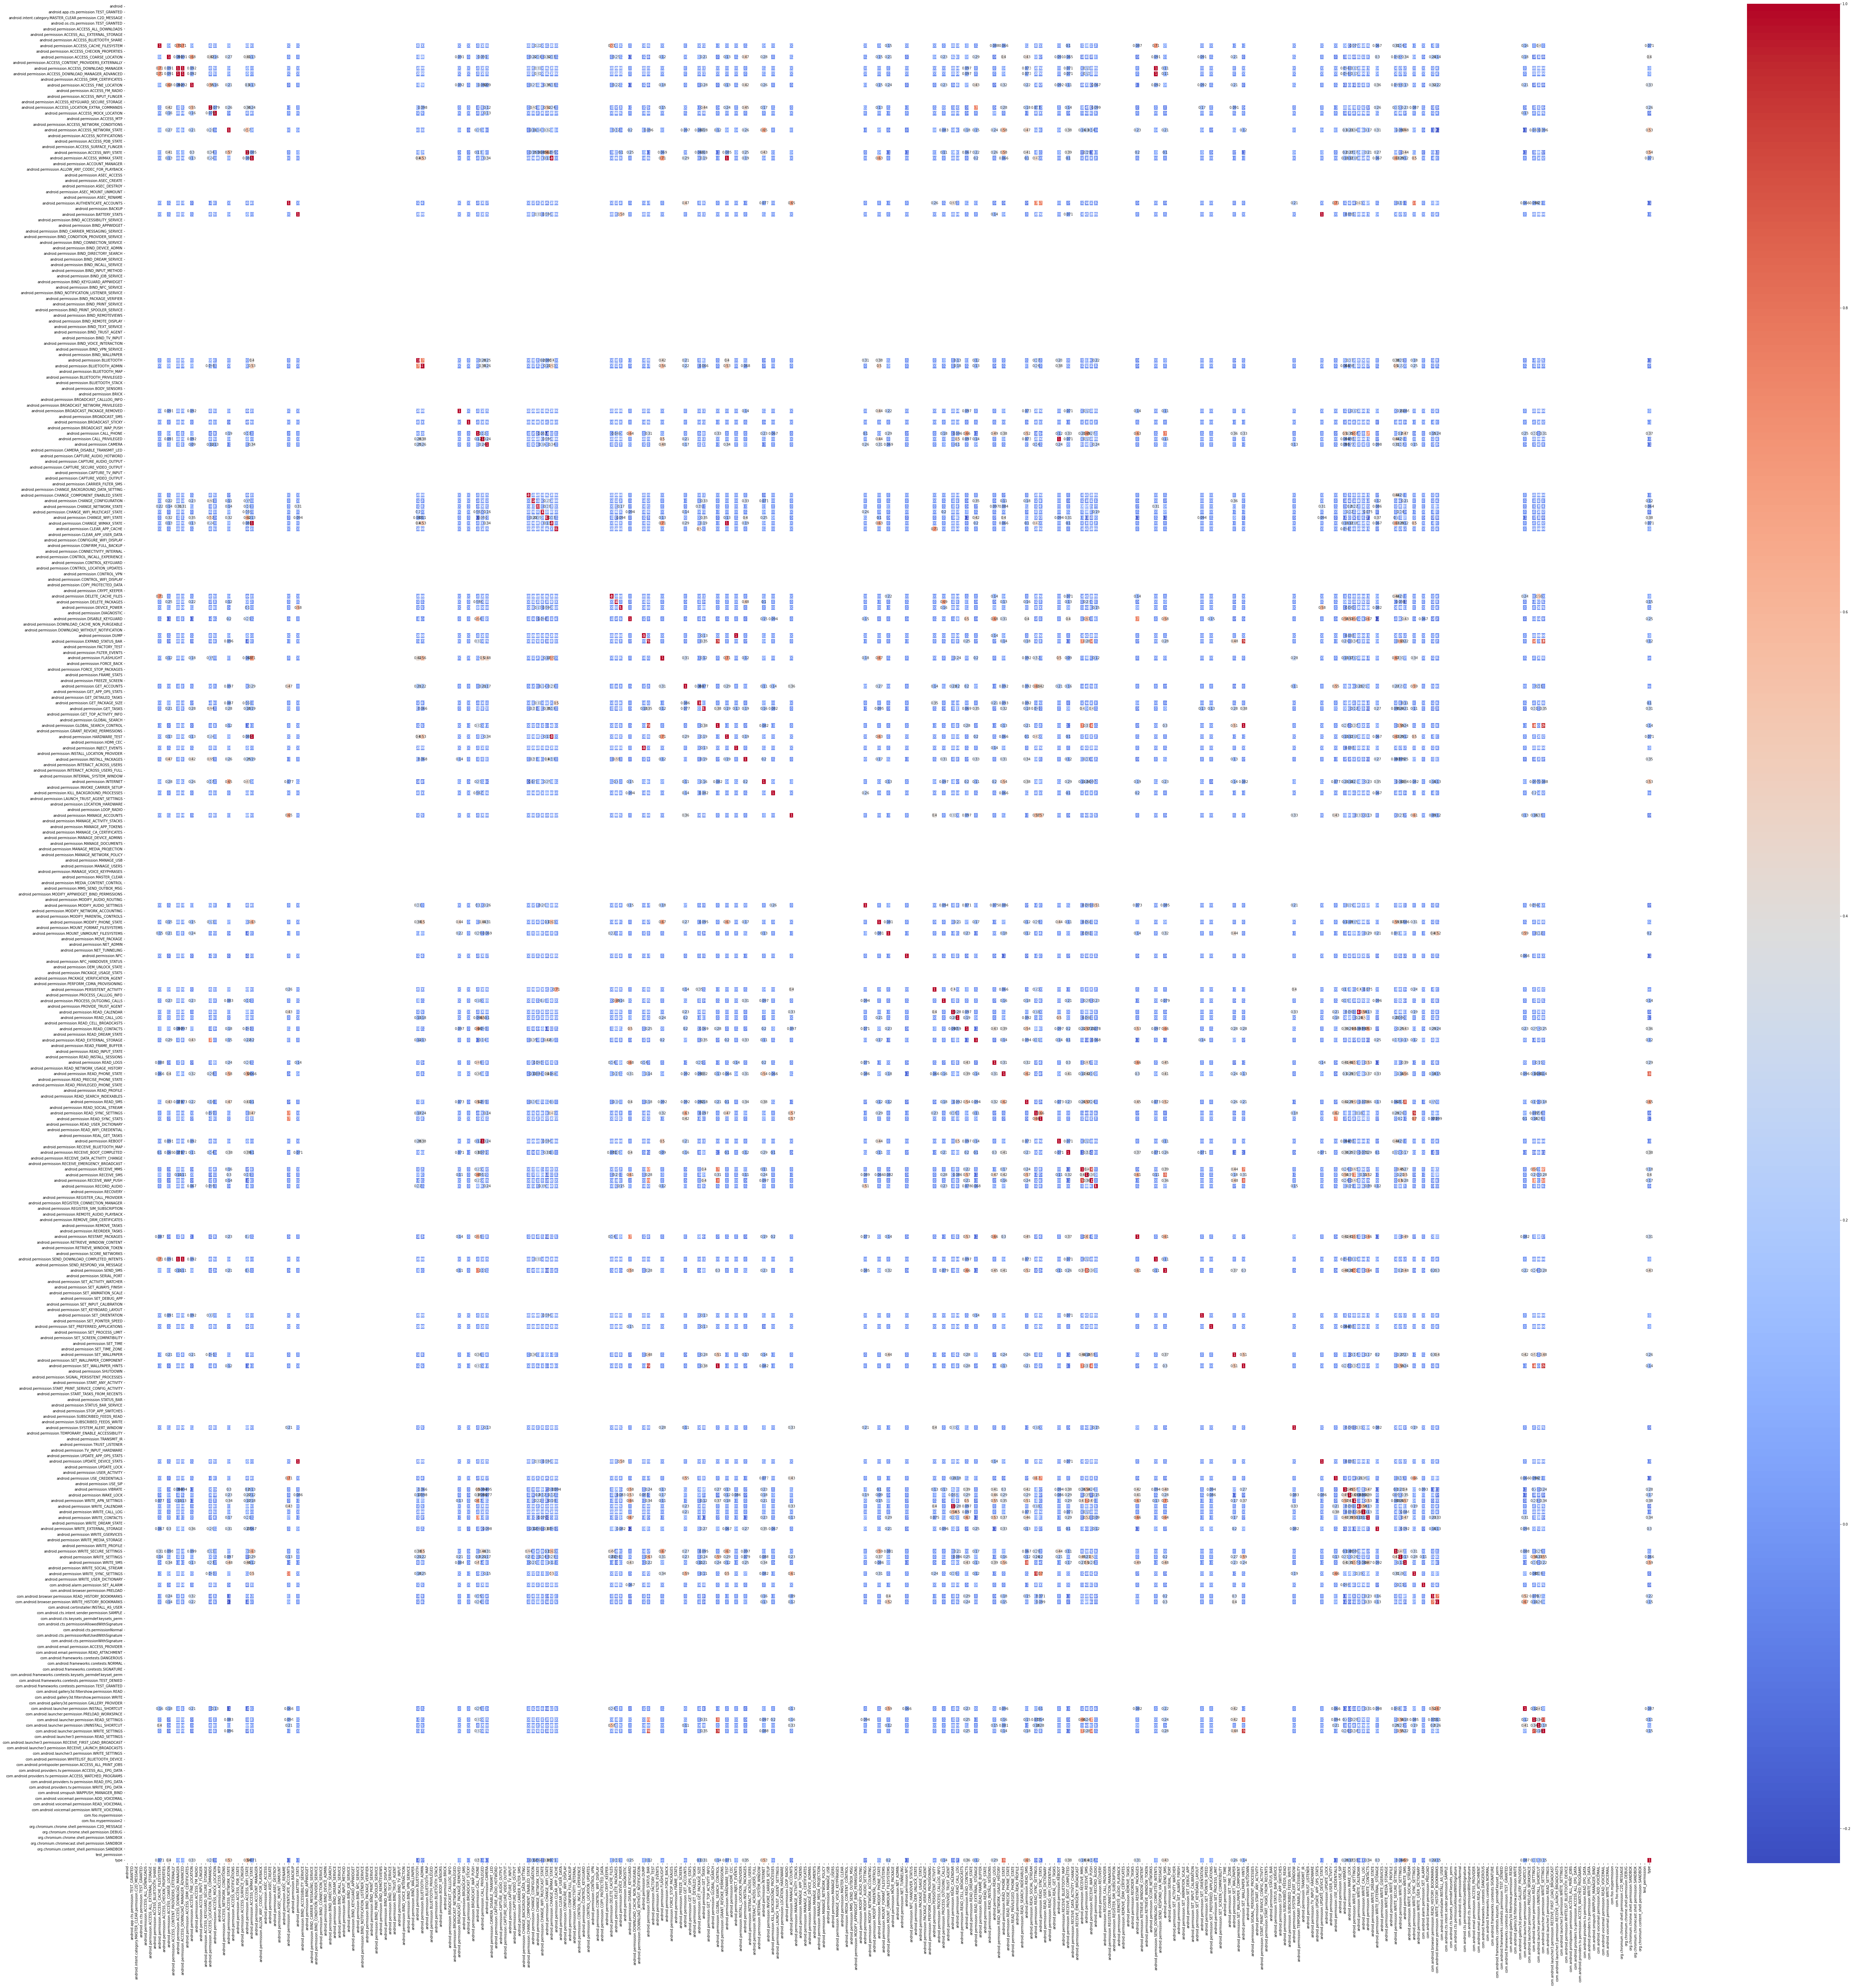

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
plt.figure(figsize=(100,100))
sns.heatmap(dt.corr(),annot=True,cmap="coolwarm",linewidth=2 )

In [ ]:
from sklearn.feature_selection import VarianceThreshold #features with low variance are less likely to be useful than features with high variance
var_thres=VarianceThreshold(threshold=0) # creating thresholder
var_thres.fit(dt) # creating high variance features

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support() 

array([False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True, False, False,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,

In [ ]:
dt.columns[var_thres.get_support()]

Index(['android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_COARSE_LOCATION',
       'android.permission.ACCESS_DOWNLOAD_MANAGER',
       'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
       'android.permission.ACCESS_FINE_LOCATION',
       'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
       'android.permission.ACCESS_MOCK_LOCATION',
       'android.permission.ACCESS_NETWORK_STATE',
       'android.permission.ACCESS_WIFI_STATE',
       'android.permission.ACCESS_WIMAX_STATE',
       'android.permission.AUTHENTICATE_ACCOUNTS',
       'android.permission.BATTERY_STATS', 'android.permission.BLUETOOTH',
       'android.permission.BLUETOOTH_ADMIN',
       'android.permission.BROADCAST_PACKAGE_REMOVED',
       'android.permission.BROADCAST_STICKY', 'android.permission.CALL_PHONE',
       'android.permission.CALL_PRIVILEGED', 'android.permission.CAMERA',
       'android.permission.CHANGE_COMPONENT_ENABLED_STATE',
       'android.permission.CHANGE_CO

In [ ]:
cols_to_keep = [column for column in dt.columns
                    if column in dt.columns[var_thres.get_support()]]

In [ ]:
cols_to_keep

['android.permission.ACCESS_CACHE_FILESYSTEM',
 'android.permission.ACCESS_COARSE_LOCATION',
 'android.permission.ACCESS_DOWNLOAD_MANAGER',
 'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
 'android.permission.ACCESS_FINE_LOCATION',
 'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
 'android.permission.ACCESS_MOCK_LOCATION',
 'android.permission.ACCESS_NETWORK_STATE',
 'android.permission.ACCESS_WIFI_STATE',
 'android.permission.ACCESS_WIMAX_STATE',
 'android.permission.AUTHENTICATE_ACCOUNTS',
 'android.permission.BATTERY_STATS',
 'android.permission.BLUETOOTH',
 'android.permission.BLUETOOTH_ADMIN',
 'android.permission.BROADCAST_PACKAGE_REMOVED',
 'android.permission.BROADCAST_STICKY',
 'android.permission.CALL_PHONE',
 'android.permission.CALL_PRIVILEGED',
 'android.permission.CAMERA',
 'android.permission.CHANGE_COMPONENT_ENABLED_STATE',
 'android.permission.CHANGE_CONFIGURATION',
 'android.permission.CHANGE_NETWORK_STATE',
 'android.permission.CHANGE_WIFI_MULTICAST_STAT

In [ ]:
print(len(cols_to_keep))

93


In [ ]:
print('Dropping unnecessary columns...')


dt.drop(columns=[col for col in dt.columns if col not in cols_to_keep], inplace=True, errors='raise') 
dt.dropna(inplace=True)
    
print('{} cleaned\n\tCreating general csv...'.format(dt))


Dropping unnecessary columns...
     android.permission.ACCESS_CACHE_FILESYSTEM  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
..                                          ...   
393                                           0   
394                                           0   
395                                           0   
396                                           0   
397                                           0   

     android.permission.ACCESS_COARSE_LOCATION  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   
..                                         ...   
393  

In [ ]:
dt.shape

(398, 93)

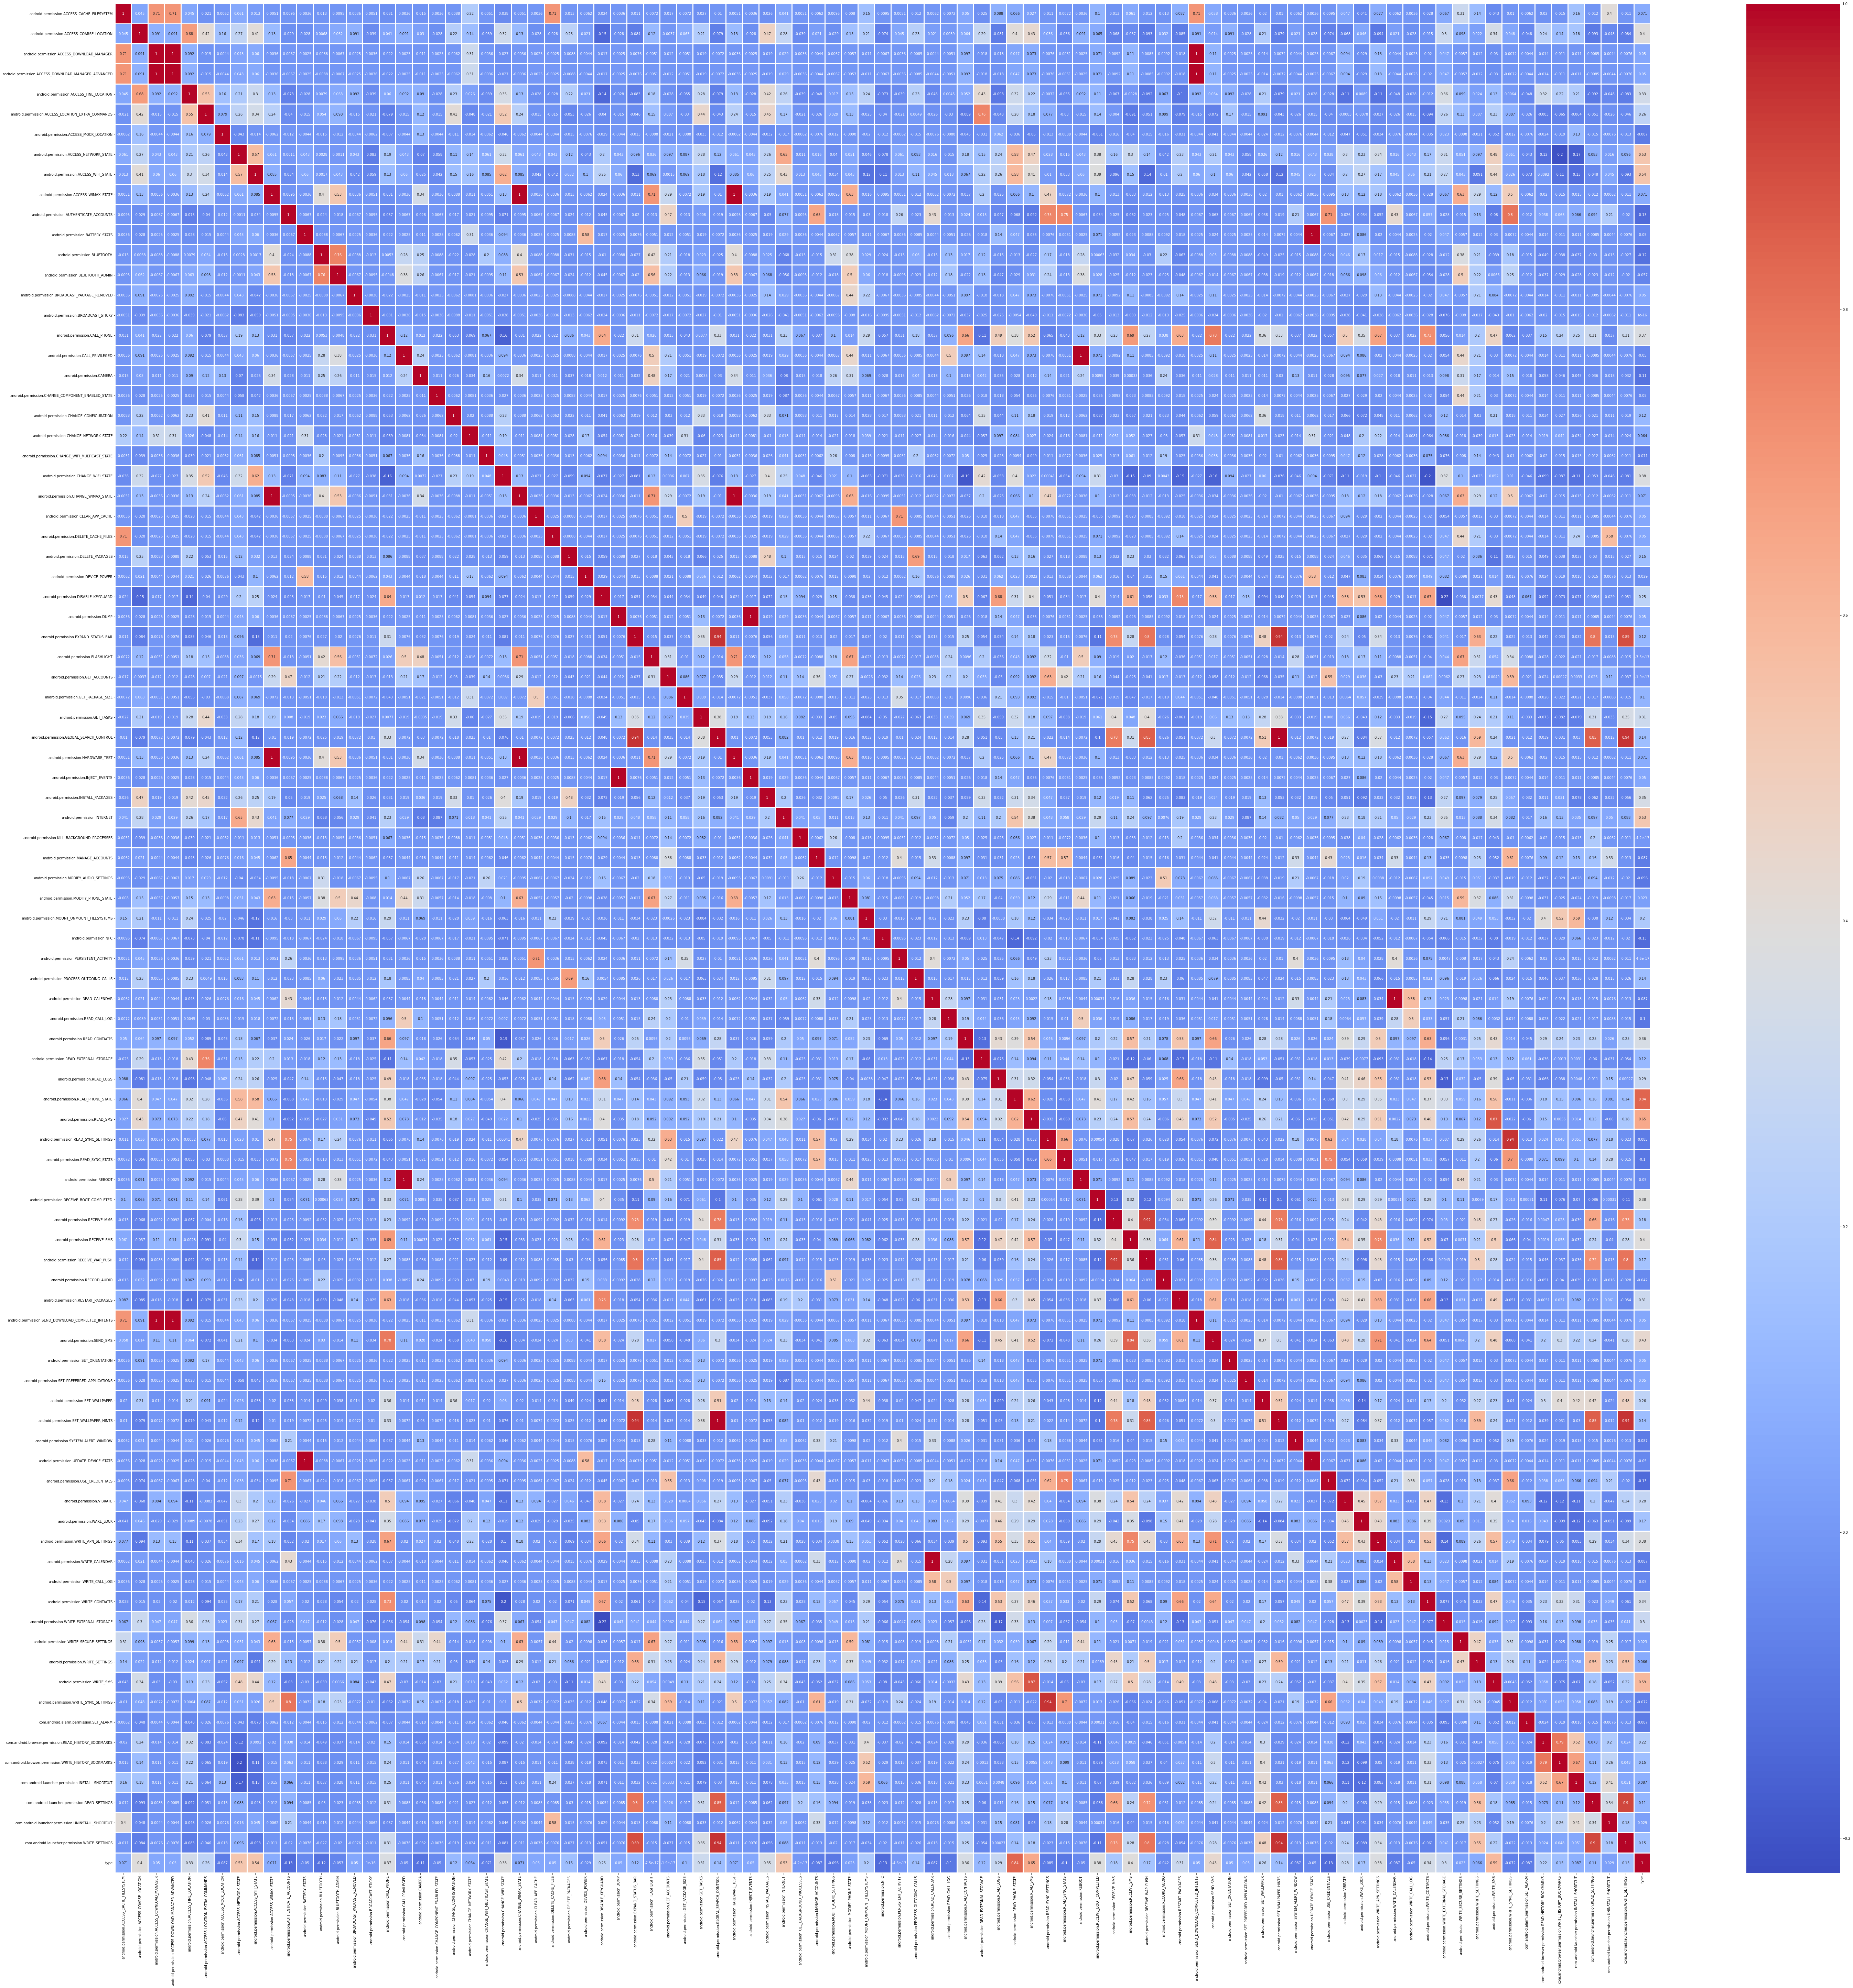

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
plt.figure(figsize=(100,100))
sns.heatmap(dt.corr(),annot=True,cmap="coolwarm",linewidth=2 )

In [ ]:
dt.isna().any()
dt.isna().sum()

android.permission.ACCESS_CACHE_FILESYSTEM               0
android.permission.ACCESS_COARSE_LOCATION                0
android.permission.ACCESS_DOWNLOAD_MANAGER               0
android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED      0
android.permission.ACCESS_FINE_LOCATION                  0
android.permission.ACCESS_LOCATION_EXTRA_COMMANDS        0
android.permission.ACCESS_MOCK_LOCATION                  0
android.permission.ACCESS_NETWORK_STATE                  0
android.permission.ACCESS_WIFI_STATE                     0
android.permission.ACCESS_WIMAX_STATE                    0
android.permission.AUTHENTICATE_ACCOUNTS                 0
android.permission.BATTERY_STATS                         0
android.permission.BLUETOOTH                             0
android.permission.BROADCAST_PACKAGE_REMOVED             0
android.permission.BROADCAST_STICKY                      0
android.permission.CALL_PHONE                            0
android.permission.CAMERA                               

In [ ]:
#Dense :implements the operation: output = activation(dot(input, kernel) + bias)
#dropout:It is used to fix the over-fitting issue. Input data may have some of the unwanted data called as Noise.
# Dropout will try to remove the noise data and thus prevent the model from over-fitting.

#activation:Applies an activation function to an output.



In [ ]:
from keras.models import Sequential, Model #sequential to arrange the layers in sequential order
                                           #model to access the model's information
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import train_test_split
import tensorflow
import numpy as np
from sklearn.preprocessing import LabelEncoder#Encode target labels with value between 0 and n_classes-1.

In [ ]:
Y = dt['type']
#print(Y)
X = dt.drop(['type'], axis=1)
encoder = LabelEncoder().fit(Y)
Y = encoder.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

35

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
'''print('Dropping unnecessary columns...')'''
dt.drop(columns=[col for col in dt.columns if col in corr_features], inplace=True, errors='raise') 
dt.dropna(inplace=True)

In [ ]:
dt.shape[1]

58

In [ ]:
dt.columns

Index(['android.permission.ACCESS_CACHE_FILESYSTEM',
       'android.permission.ACCESS_COARSE_LOCATION',
       'android.permission.ACCESS_DOWNLOAD_MANAGER',
       'android.permission.ACCESS_DOWNLOAD_MANAGER_ADVANCED',
       'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
       'android.permission.ACCESS_MOCK_LOCATION',
       'android.permission.ACCESS_NETWORK_STATE',
       'android.permission.ACCESS_WIFI_STATE',
       'android.permission.ACCESS_WIMAX_STATE',
       'android.permission.AUTHENTICATE_ACCOUNTS',
       'android.permission.BATTERY_STATS', 'android.permission.BLUETOOTH',
       'android.permission.BROADCAST_PACKAGE_REMOVED',
       'android.permission.BROADCAST_STICKY', 'android.permission.CALL_PHONE',
       'android.permission.CALL_PRIVILEGED', 'android.permission.CAMERA',
       'android.permission.CHANGE_COMPONENT_ENABLED_STATE',
       'android.permission.CHANGE_CONFIGURATION',
       'android.permission.CHANGE_NETWORK_STATE',
       'android.permission.CHAN

In [ ]:

AN = Sequential() #defining the Model
AN.add(Dense(256, activation='relu', input_dim=dt.shape[1]-1))#adds a layer (units),specifies the input shape
AN.add(Dropout(0.2))#(droput rate) to avoid overfitting 
AN.add(Dense(128, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(128, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(32, activation='relu'))
AN.add(Dropout(0.2))
AN.add(Dense(1, activation='sigmoid'))#due to binary classification sigmoid function is used.(output layer)

AN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

AN.fit(X_train, y_train, epochs=5, batch_size=32)#model training 


scores = AN.evaluate(X_test, y_test)#check whether the model is best fit for the given problem and corresponding data
                    
for i in range(len(scores)):
  print("\n%s: %.2f%%" % (AN.metrics_names[i], scores[i]*100))

Epoch 1/5
8/8 [==============================] - 1s 5ms/step - loss: 0.6746 - accuracy: 0.6303
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.5878 - accuracy: 0.7311
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.8613
Epoch 4/5
8/8 [==============================] - 0s 5ms/step - loss: 0.3588 - accuracy: 0.9160
Epoch 5/5
5/5 [==============================] - 0s 5ms/step - loss: 0.1829 - accuracy: 0.9438

loss: 18.29%

accuracy: 94.38%


In [ ]:
AN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               16384     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 32)               